# Comparision between Brisbane results and their simulation counter part
- This notebook creates the Figure 6, 7, and 8 in the paper.

# Import

In [1]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. First set of conditions
- Simulation results

In [2]:
simulation1 = pd.read_excel("cond1sim_data.xlsx", dtype={"States": str})
simu_counts = dict(zip(simulation1["States"], simulation1["Counts"]))

- Brisbane results

In [3]:
experiment1 = pd.read_excel("cond1_Brisbane_data.xlsx", dtype={"States": str})
counts = dict(zip(experiment1["States"], experiment1["Counts"]))

- In the first and second sets, there will be a difference in the number of states with non-zero probability, and these states will not be shown on the chart as in the previous figures. Therefore, to be able to make the clearest comparison, the states with zero probability also need to be shown on the chart. 
- The following step will make such states still visible when plotting the chart

In [4]:
for key in counts.keys():
    if key not in simu_counts:
        simu_counts[key] = 0

- Comparing two sets of results

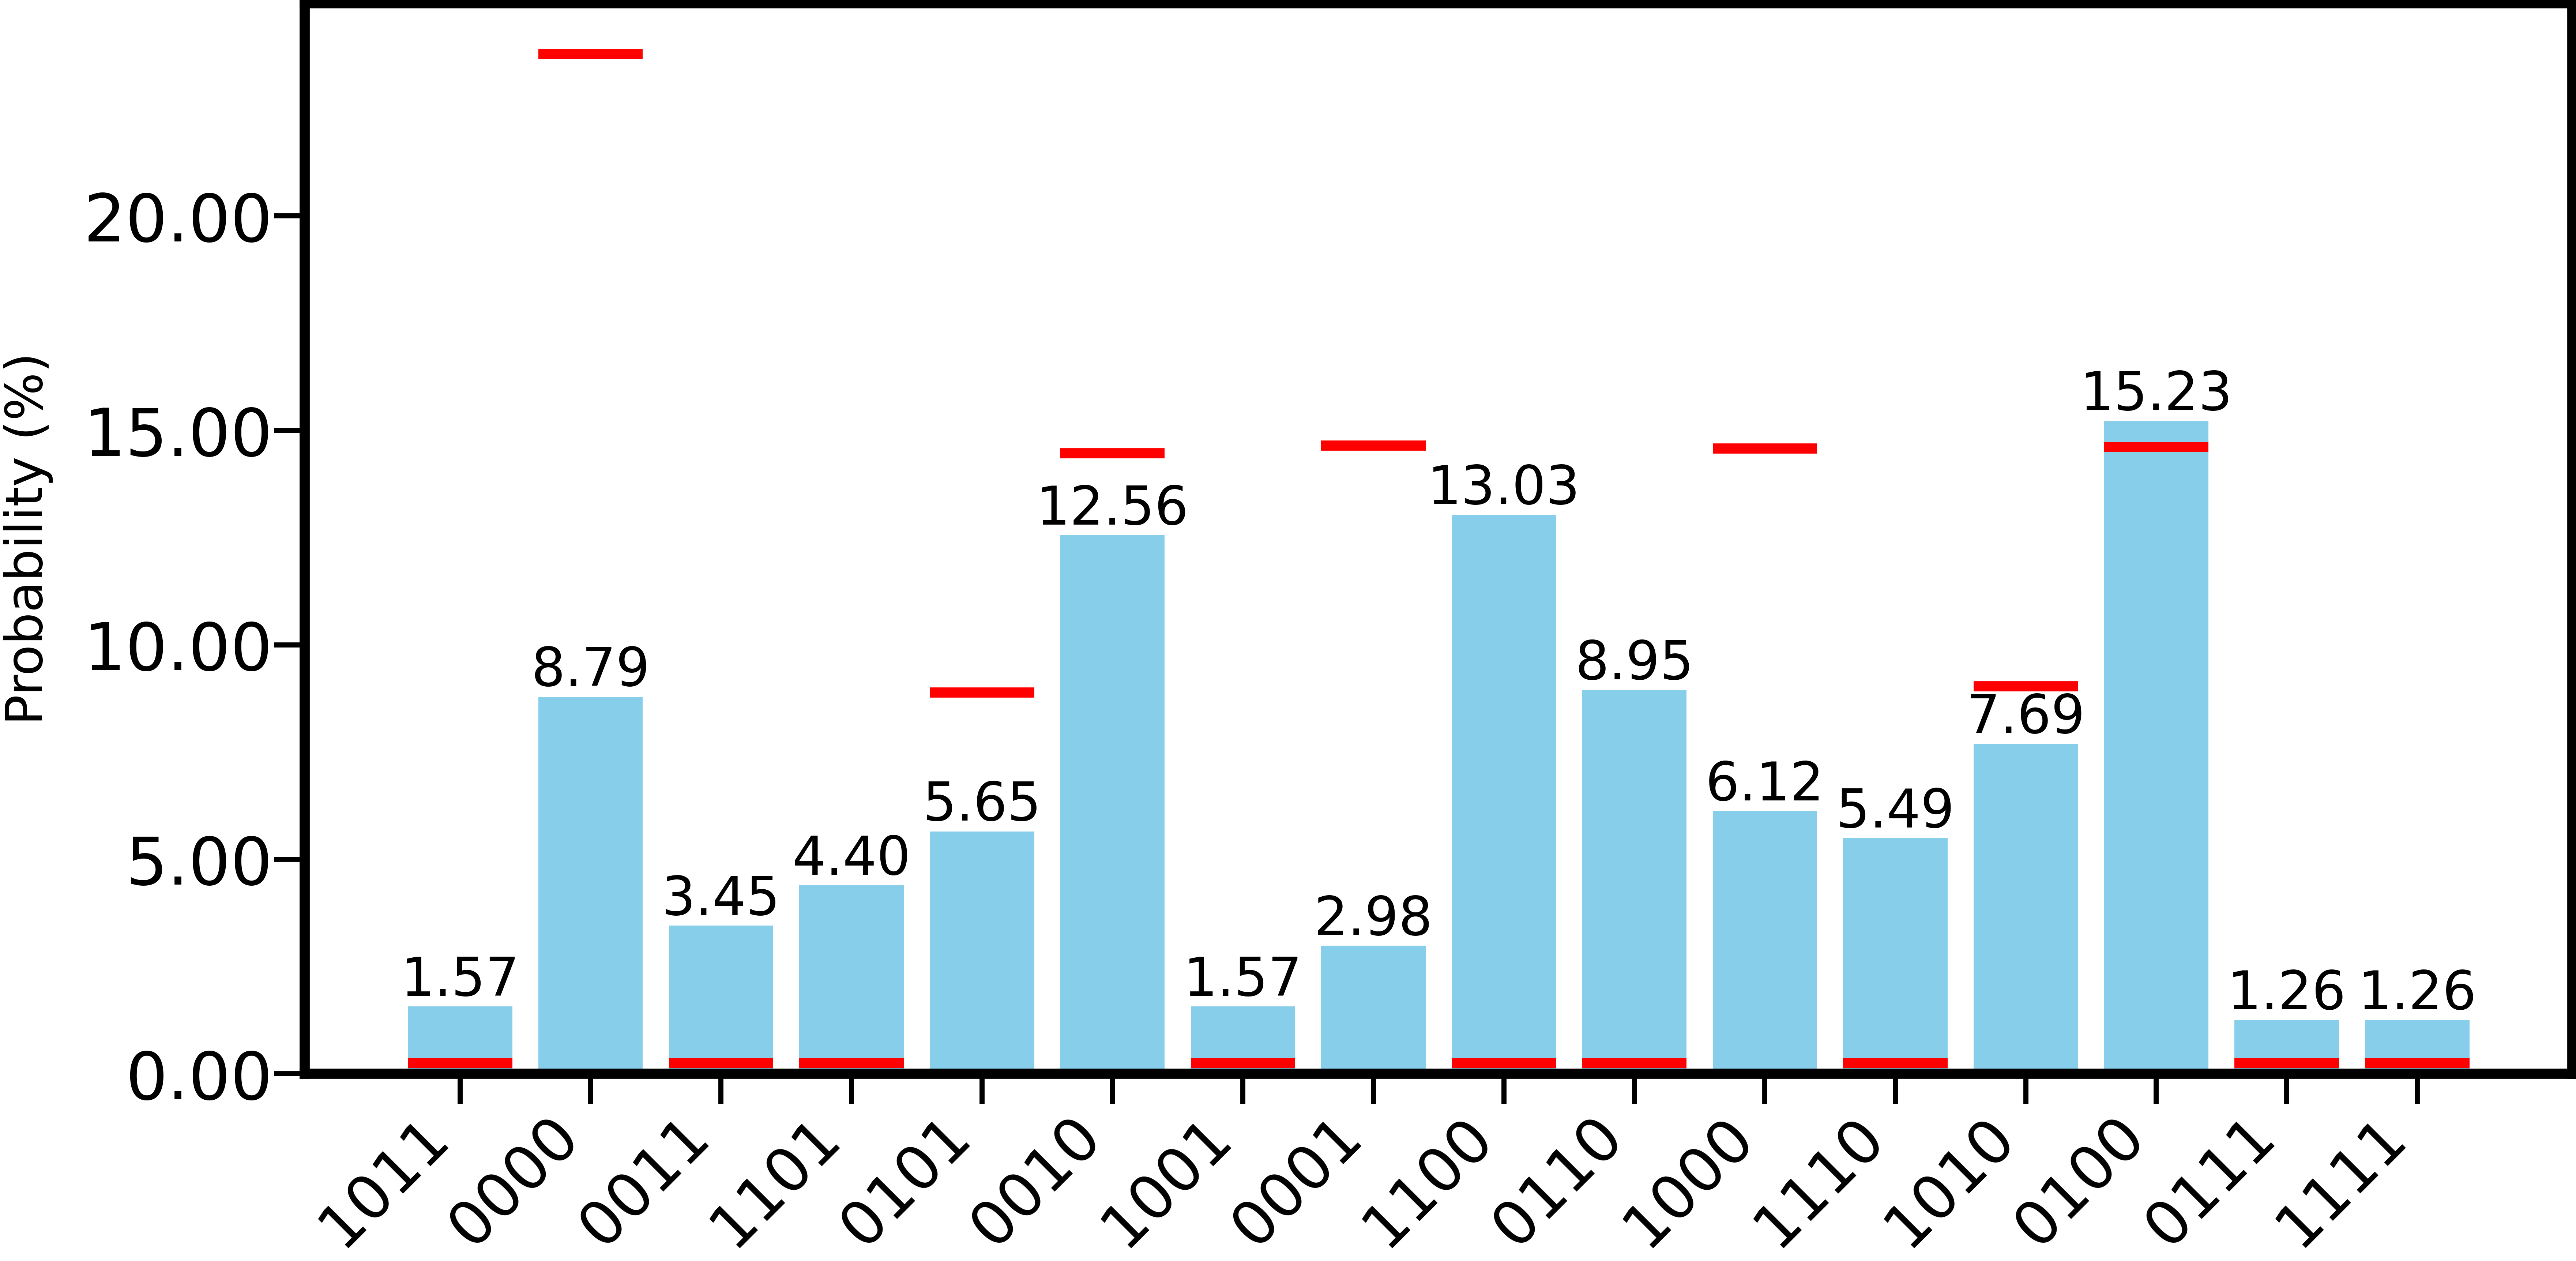

In [5]:
total_count = sum(counts.values())
total_simu_counts = sum(simu_counts.values())

probabilities = {state: count / total_count for state, count in counts.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(80, 38))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=105)
for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=120)
plt.tick_params(axis='y', labelsize=130)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=100, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')

plt.show()

# 2. Second set of conditions
## 2.1. $R_y(-\theta)$ on the first qubit

- Simulation results

In [6]:
simulation21 = pd.read_excel("cond21sim_data.xlsx", dtype={"States": str})
simu_counts21 = dict(zip(simulation21["States"], simulation21["Counts"]))

- Brisbane results

In [7]:
experiment21 = pd.read_excel("cond21_Brisbane_data.xlsx", dtype={"States": str})
counts21 = dict(zip(experiment21["States"], experiment21["Counts"]))

In [10]:
for key in counts21.keys():
    if key not in simu_counts21:
        simu_counts21[key] = 0

- Comparing two sets of results

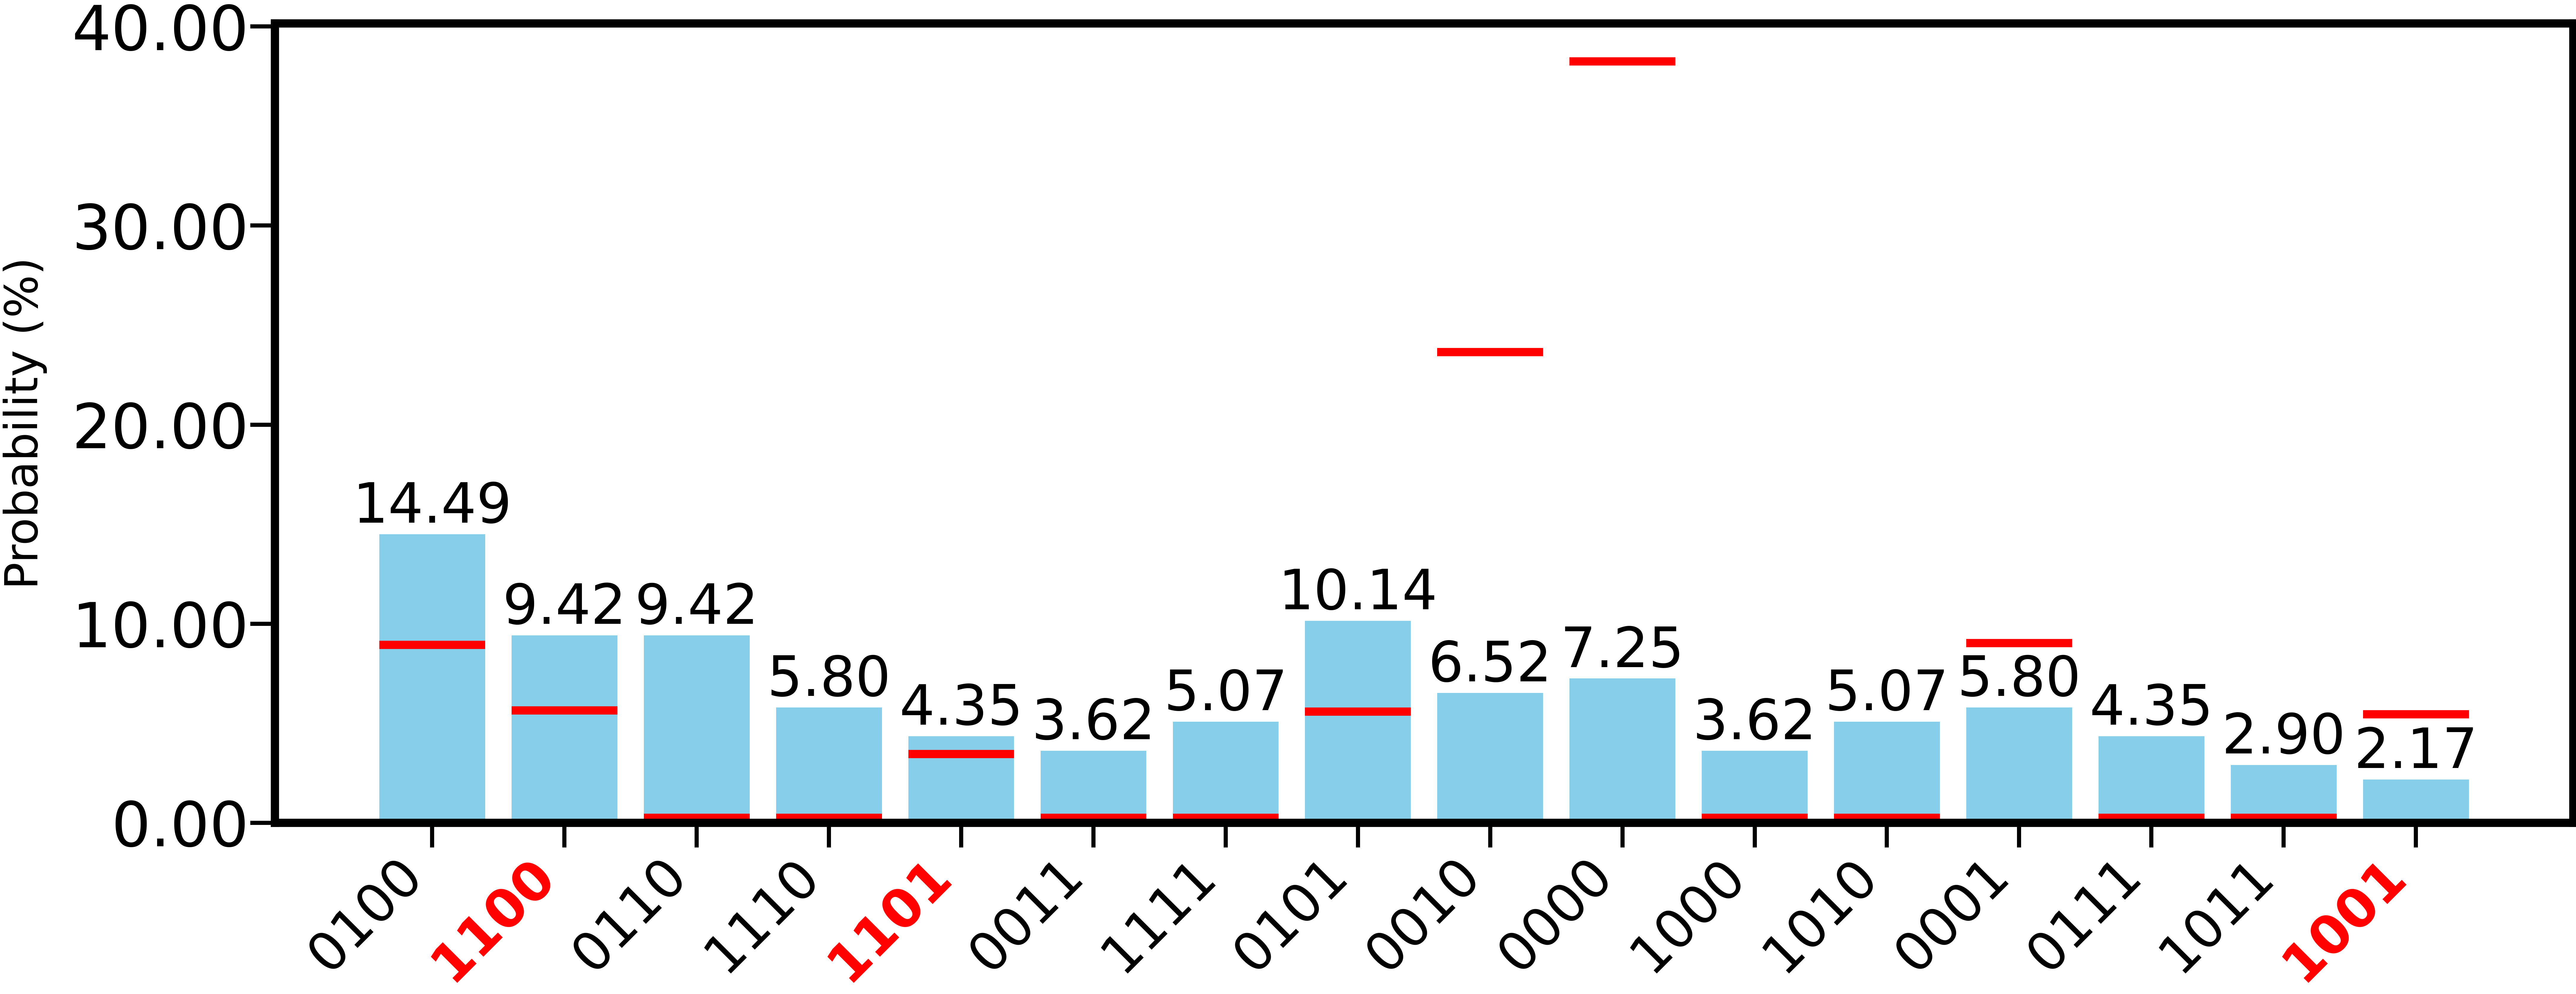

In [11]:
total_count21 = sum(counts21.values())
total_simu_counts21 = sum(simu_counts21.values())

probabilities = {state: count / total_count21 for state, count in counts21.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts21 for state, count in simu_counts21.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(100, 35))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=135)

highlight_states = {'1100', '1001', '1101'}  
tick_labels = plt.gca().get_xticklabels()  
tick_labels_text = plt.gca().get_xticklabels() 
for label, state in zip(tick_labels_text, states):  
    if state in highlight_states:
        label.set_color('red')  
        label.set_fontweight('bold') 

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)

def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=130)
plt.tick_params(axis='y', labelsize=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=110, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')

plt.show()    

## 2.2. $R_y(-\theta)$ on the second qubit

- Simulation results

In [12]:
simulation22 = pd.read_excel("cond22sim_data.xlsx", dtype={"States": str})
simu_counts22 = dict(zip(simulation22["States"], simulation22["Counts"]))

- Brisbane results

In [13]:
experiment22 = pd.read_excel("cond22_Brisbane_data.xlsx", dtype={"States": str})
counts22 = dict(zip(experiment22["States"], experiment22["Counts"]))

In [14]:
for key in counts22.keys():
    if key not in simu_counts22:
        simu_counts22[key] = 0

- Comparing two sets of results

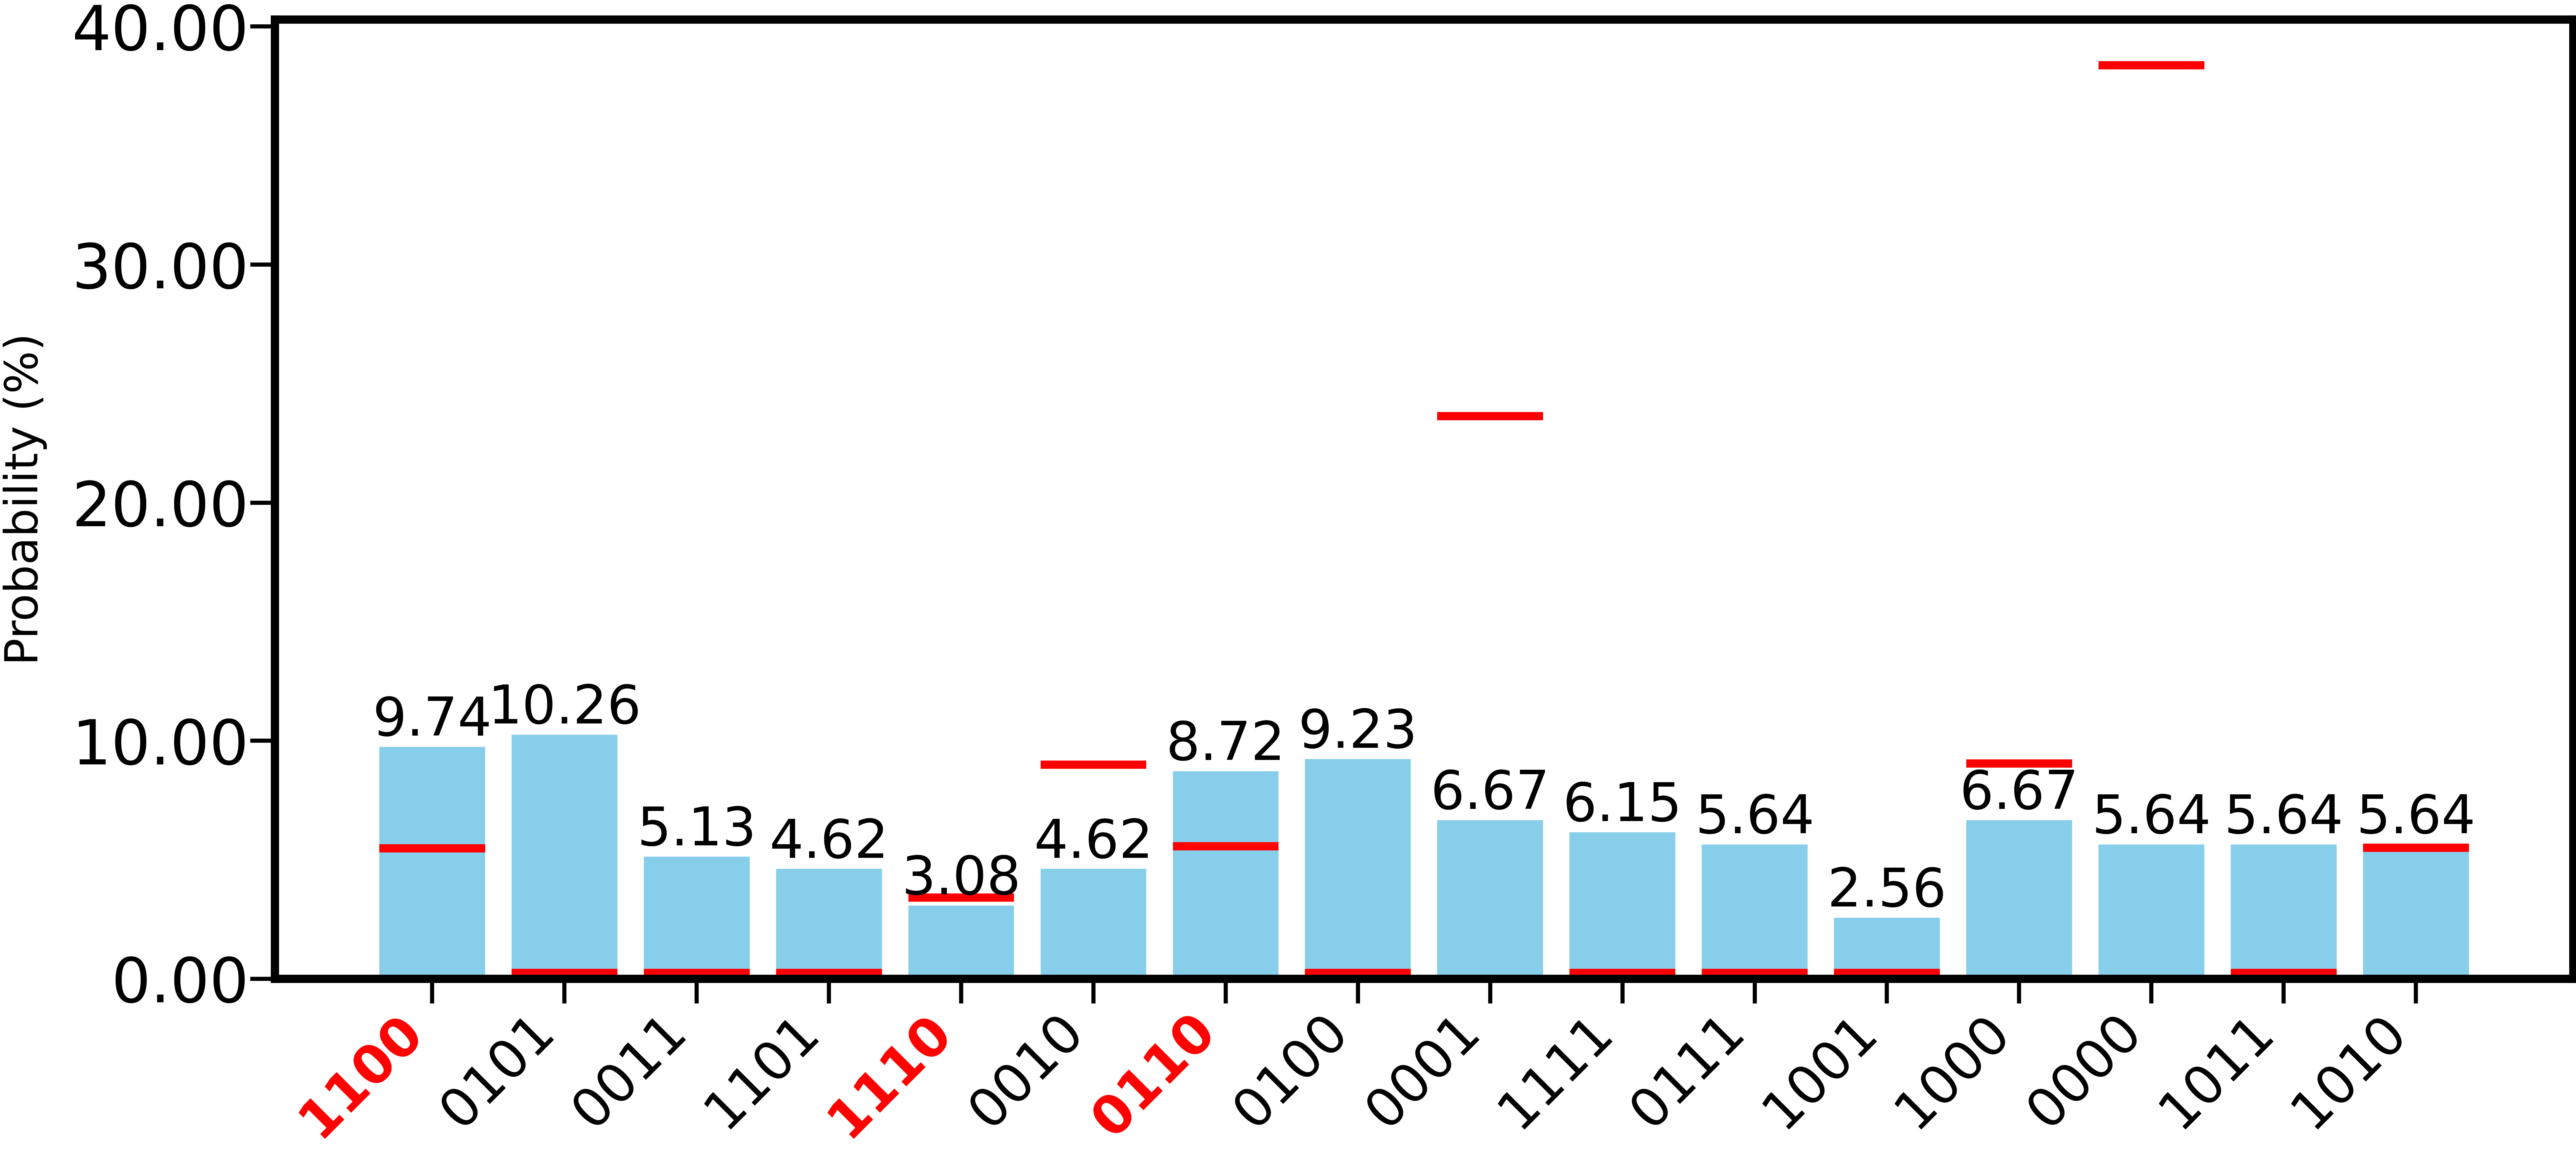

In [15]:
total_count22 = sum(counts22.values())
total_simu_counts22 = sum(simu_counts22.values())

probabilities = {state: count / total_count22 for state, count in counts22.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts22 for state, count in simu_counts22.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(100, 42))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=130)
highlight_states = {'1100', '0110', '1110'}  
tick_labels = plt.gca().get_xticklabels()  
tick_labels_text = plt.gca().get_xticklabels() 
for label, state in zip(tick_labels_text, states):  
    if state in highlight_states:
        label.set_color('red')  
        label.set_fontweight('bold') 

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)

def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=130)
plt.tick_params(axis='y', labelsize=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=110, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')

plt.show() 

## 2.3. $R_y(-\theta)$ on the third qubit

- Simulation results

In [16]:
simulation23 = pd.read_excel("cond23sim_data.xlsx", dtype={"States": str})
simu_counts23 = dict(zip(simulation23["States"], simulation23["Counts"]))

- Brisbane results

In [17]:
experiment23 = pd.read_excel("cond23_Brisbane_data.xlsx", dtype={"States": str})
counts23 = dict(zip(experiment23["States"], experiment23["Counts"]))

In [18]:
for key in counts23.keys():
    if key not in simu_counts23:
        simu_counts23[key] = 0

- Comparing two sets of results

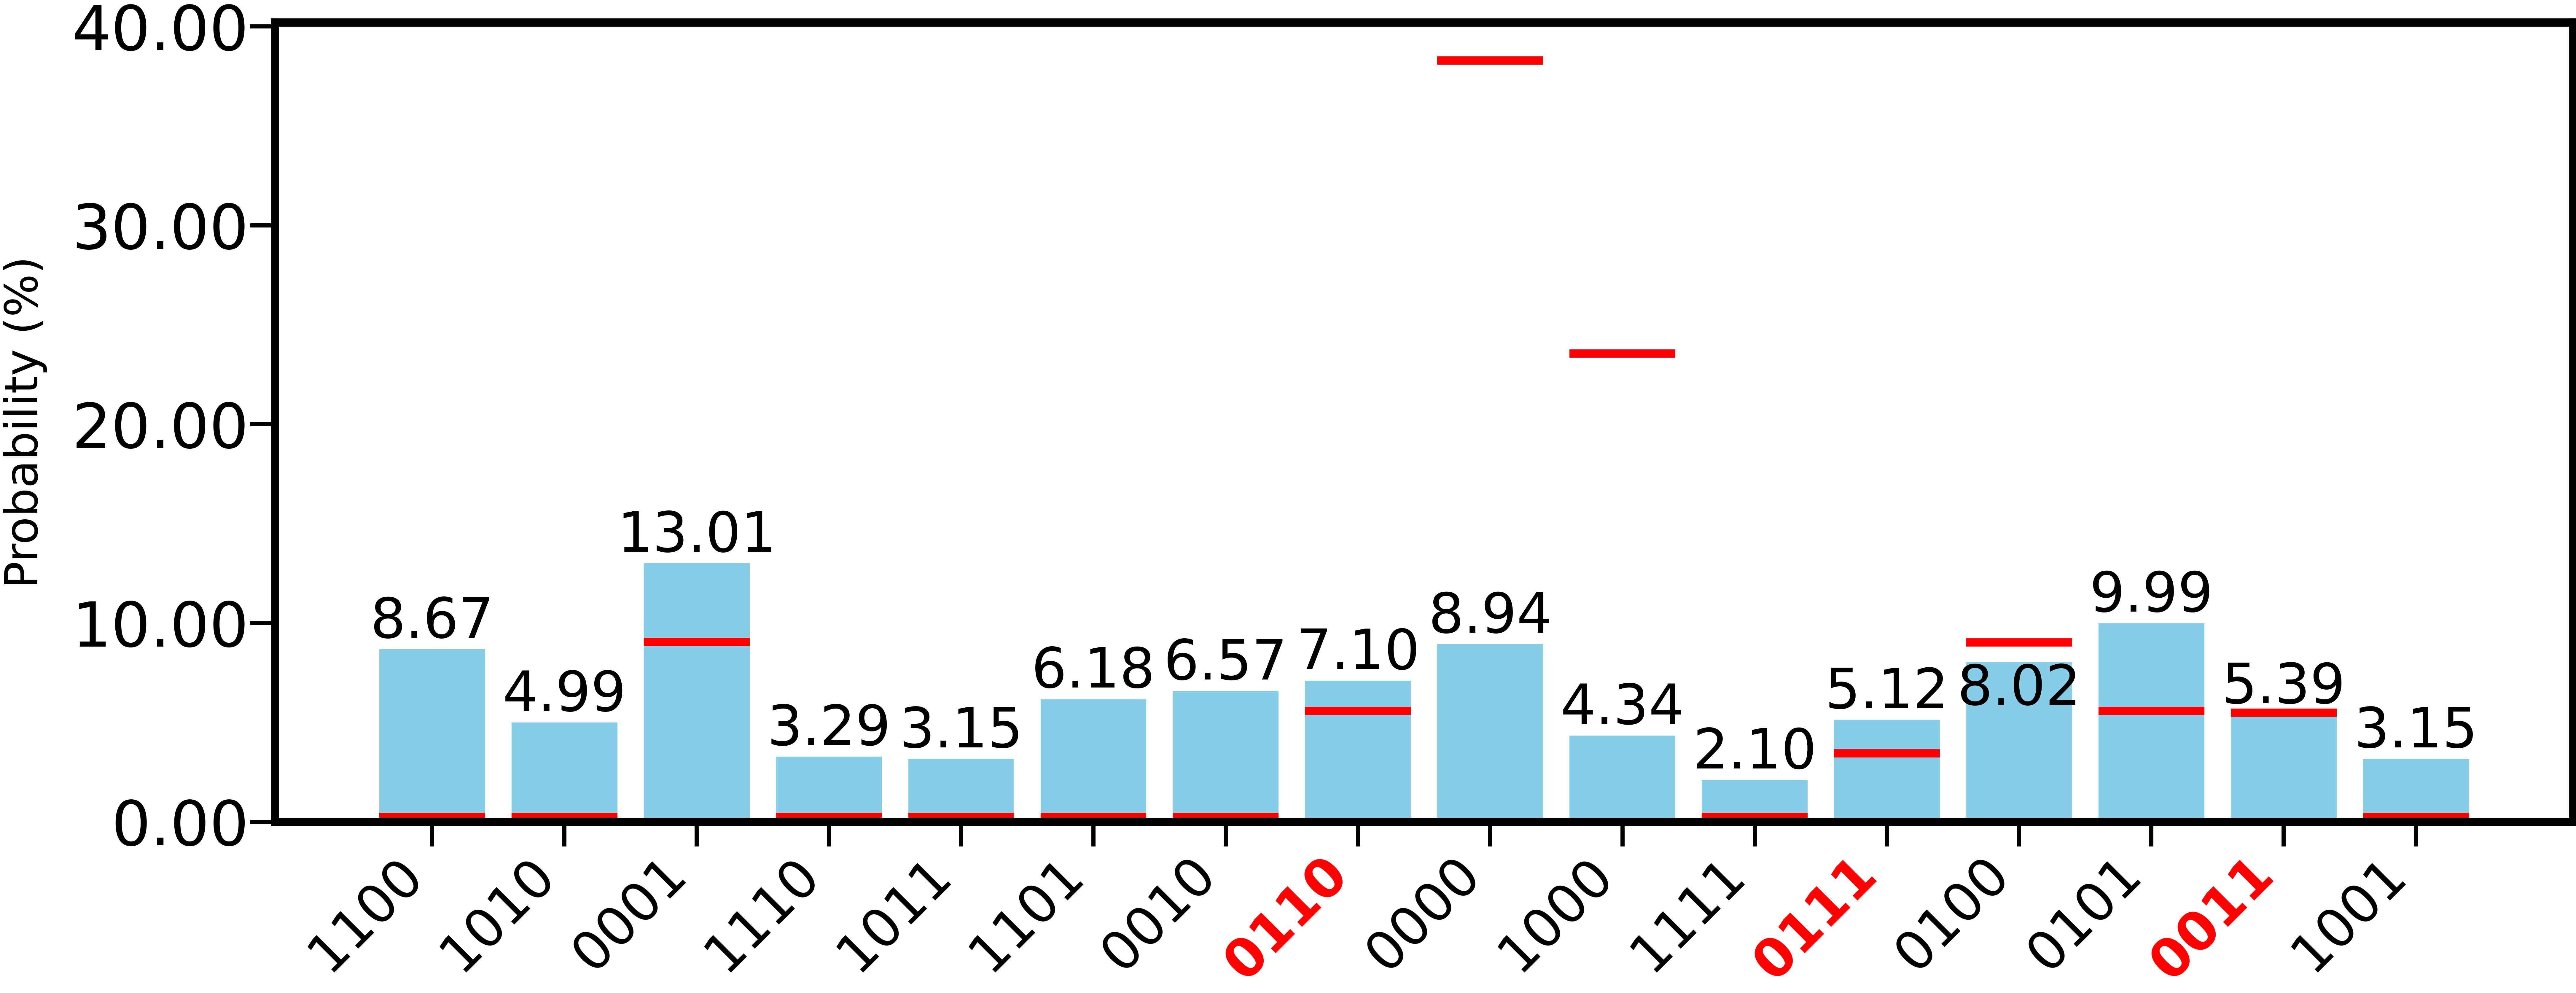

In [19]:
total_count23 = sum(counts23.values())
total_simu_counts23 = sum(simu_counts23.values())

probabilities = {state: count / total_count23 for state, count in counts23.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts23 for state, count in simu_counts23.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(100, 35))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob, state in zip(bars, prob_values, states):
    if state =="0100":
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                  f'{prob * 100:.2f}', ha='center', va='top', fontsize=135)
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=135)


highlight_states = {'0110', '0011', '0111'}  
tick_labels = plt.gca().get_xticklabels()  
tick_labels_text = plt.gca().get_xticklabels() 
for label, state in zip(tick_labels_text, states):  
    if state in highlight_states:
        label.set_color('red')  
        label.set_fontweight('bold') 

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)

def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=130)
plt.tick_params(axis='y', labelsize=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=110, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')
plt.show() 

## 2.4. $R_y(-\theta)$ on the fourth qubit

- Simulation results

In [20]:
simulation24 = pd.read_excel("cond24sim_data.xlsx", dtype={"States": str})
simu_counts24 = dict(zip(simulation24["States"], simulation24["Counts"]))

- Brisbane results

In [21]:
experiment24 = pd.read_excel("cond24_Brisbane_data.xlsx", dtype={"States": str})
counts24 = dict(zip(experiment24["States"], experiment24["Counts"]))

In [22]:
for key in counts24.keys():
    if key not in simu_counts24:
        simu_counts24[key] = 0

- Comparing two sets of results

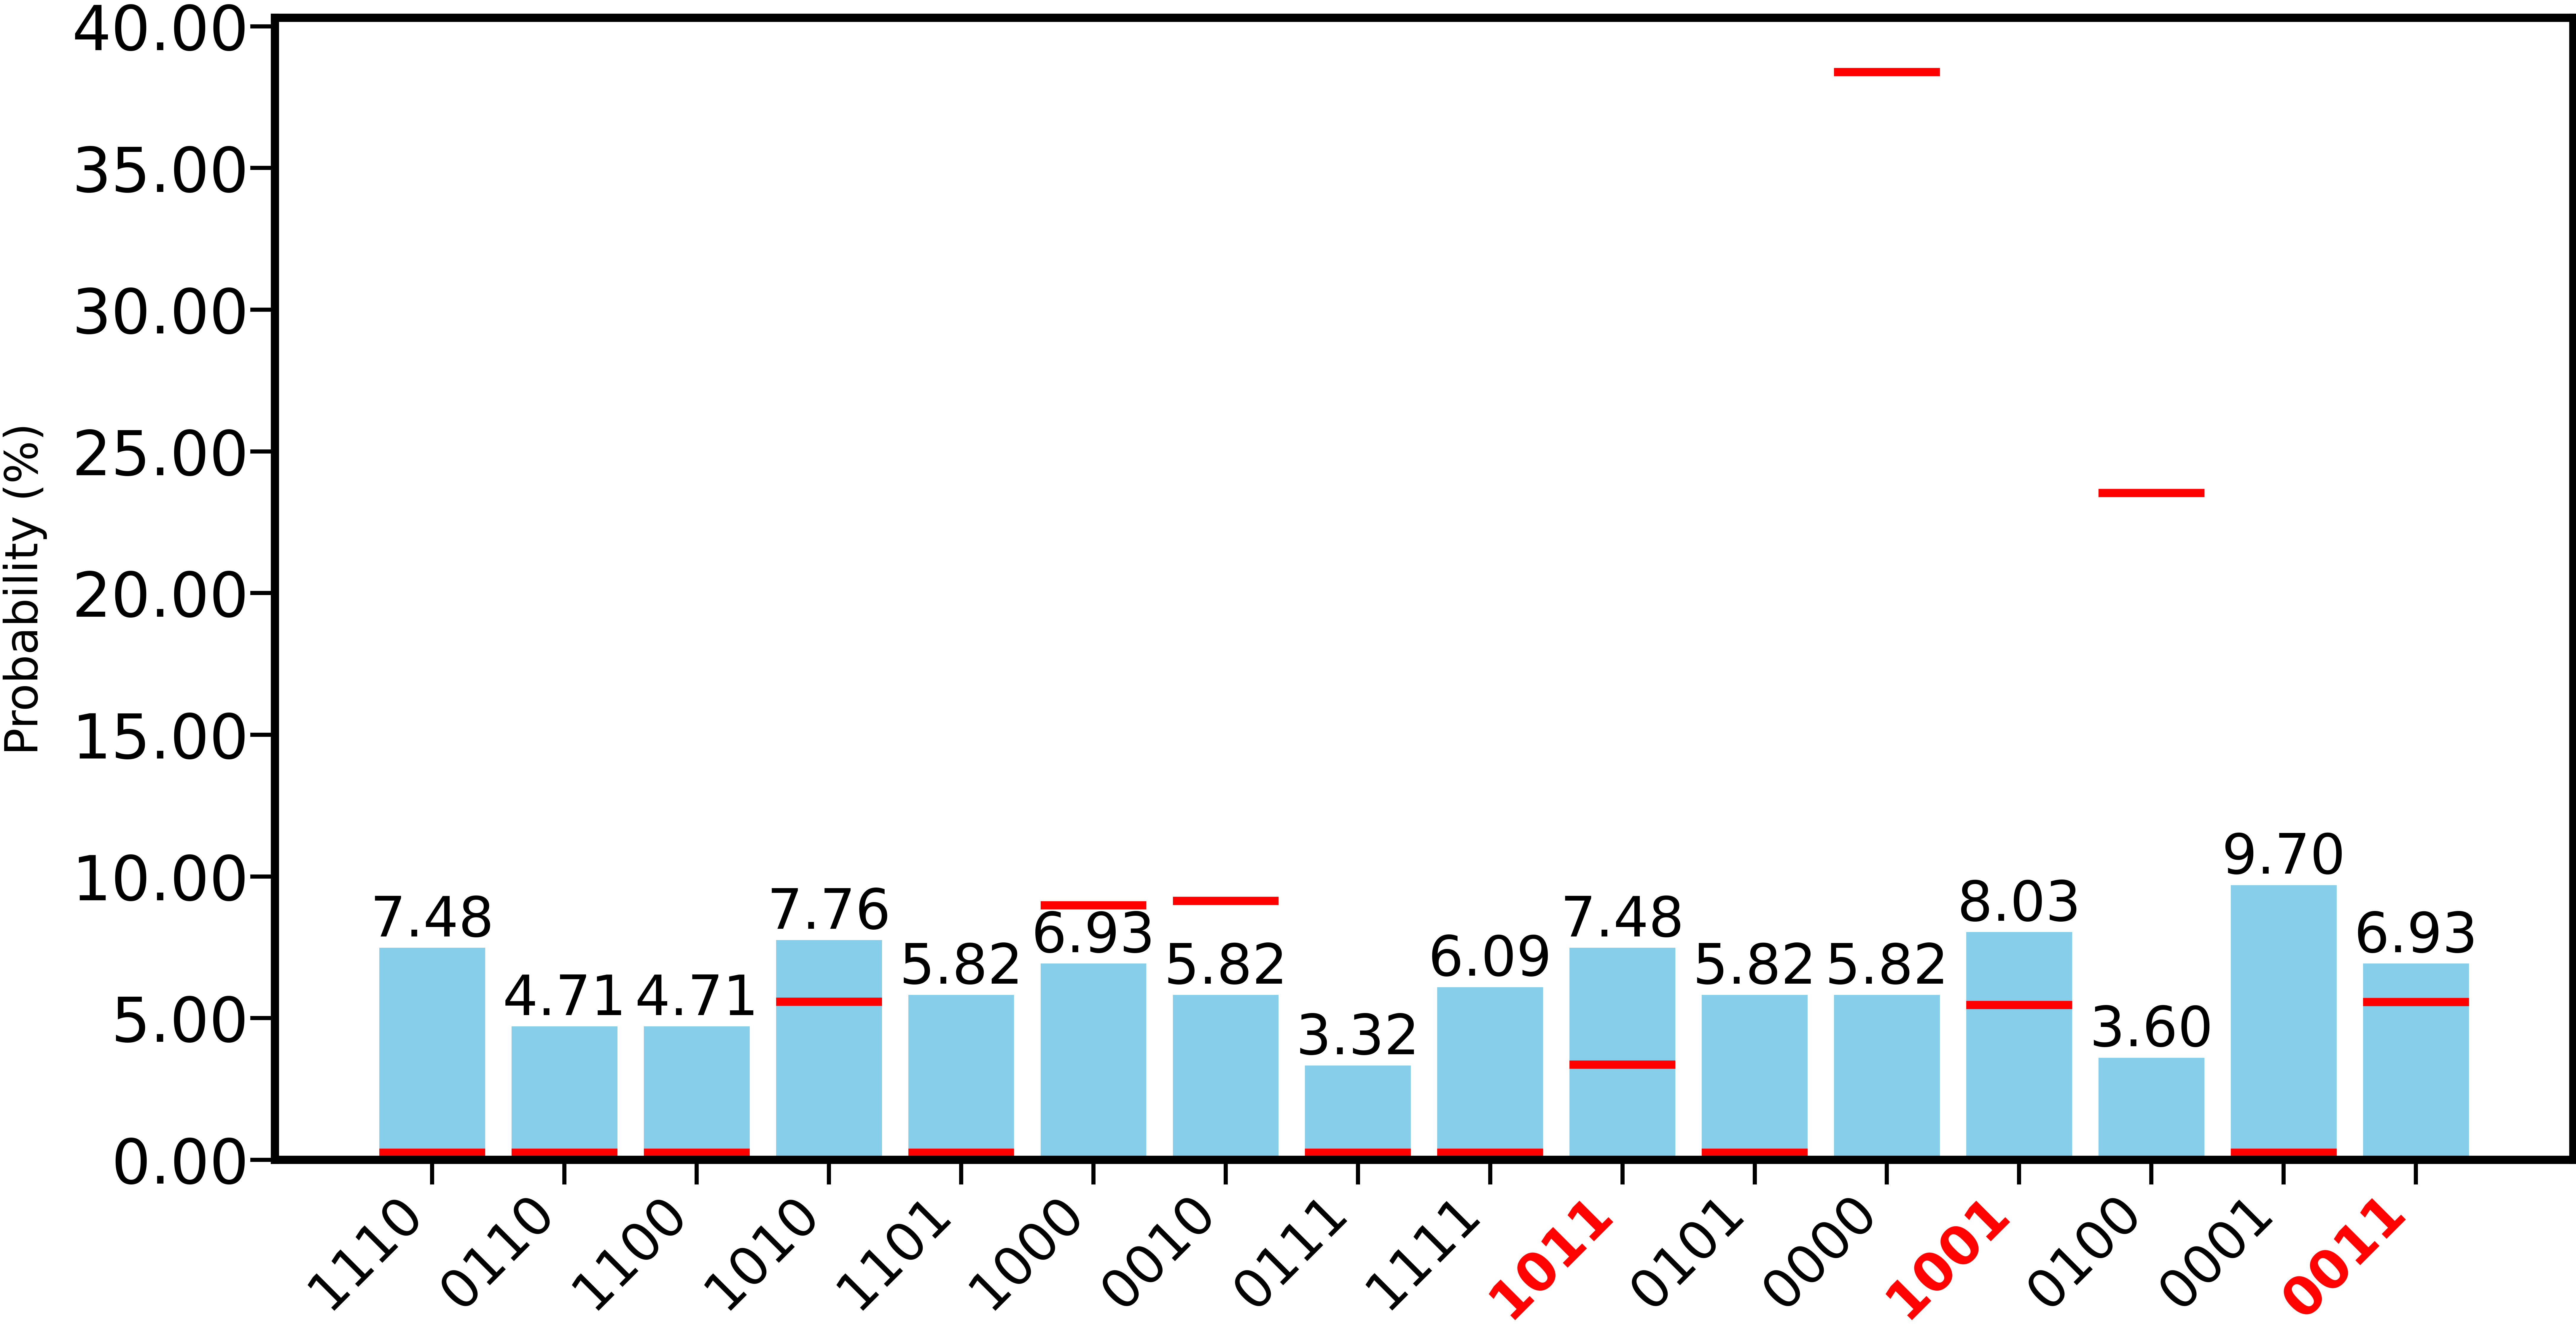

In [23]:
total_count24 = sum(counts24.values())
total_simu_counts24 = sum(simu_counts24.values())

probabilities = {state: count / total_count24 for state, count in counts24.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts24 for state, count in simu_counts24.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(100, 50))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=135)
highlight_states = {'0011', '1001', '1011'}  
tick_labels = plt.gca().get_xticklabels()  
tick_labels_text = plt.gca().get_xticklabels() 
for label, state in zip(tick_labels_text, states):  
    if state in highlight_states:
        label.set_color('red')  
        label.set_fontweight('bold') 

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)

def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=130)
plt.tick_params(axis='y', labelsize=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=110, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')
plt.show()  

# 3. Third set of conditions

- Simulation results

In [24]:
simulation3 = pd.read_excel("cond3sim_data.xlsx", dtype={"States": str})
simu_counts3 = dict(zip(simulation3["States"], simulation3["Counts"]))

- Brisbane results

In [25]:
experiment3 = pd.read_excel("cond3_Brisbane_data.xlsx", dtype={"States": str})
counts3 = dict(zip(experiment3["States"], experiment3["Counts"]))

- Comparing two sets of results

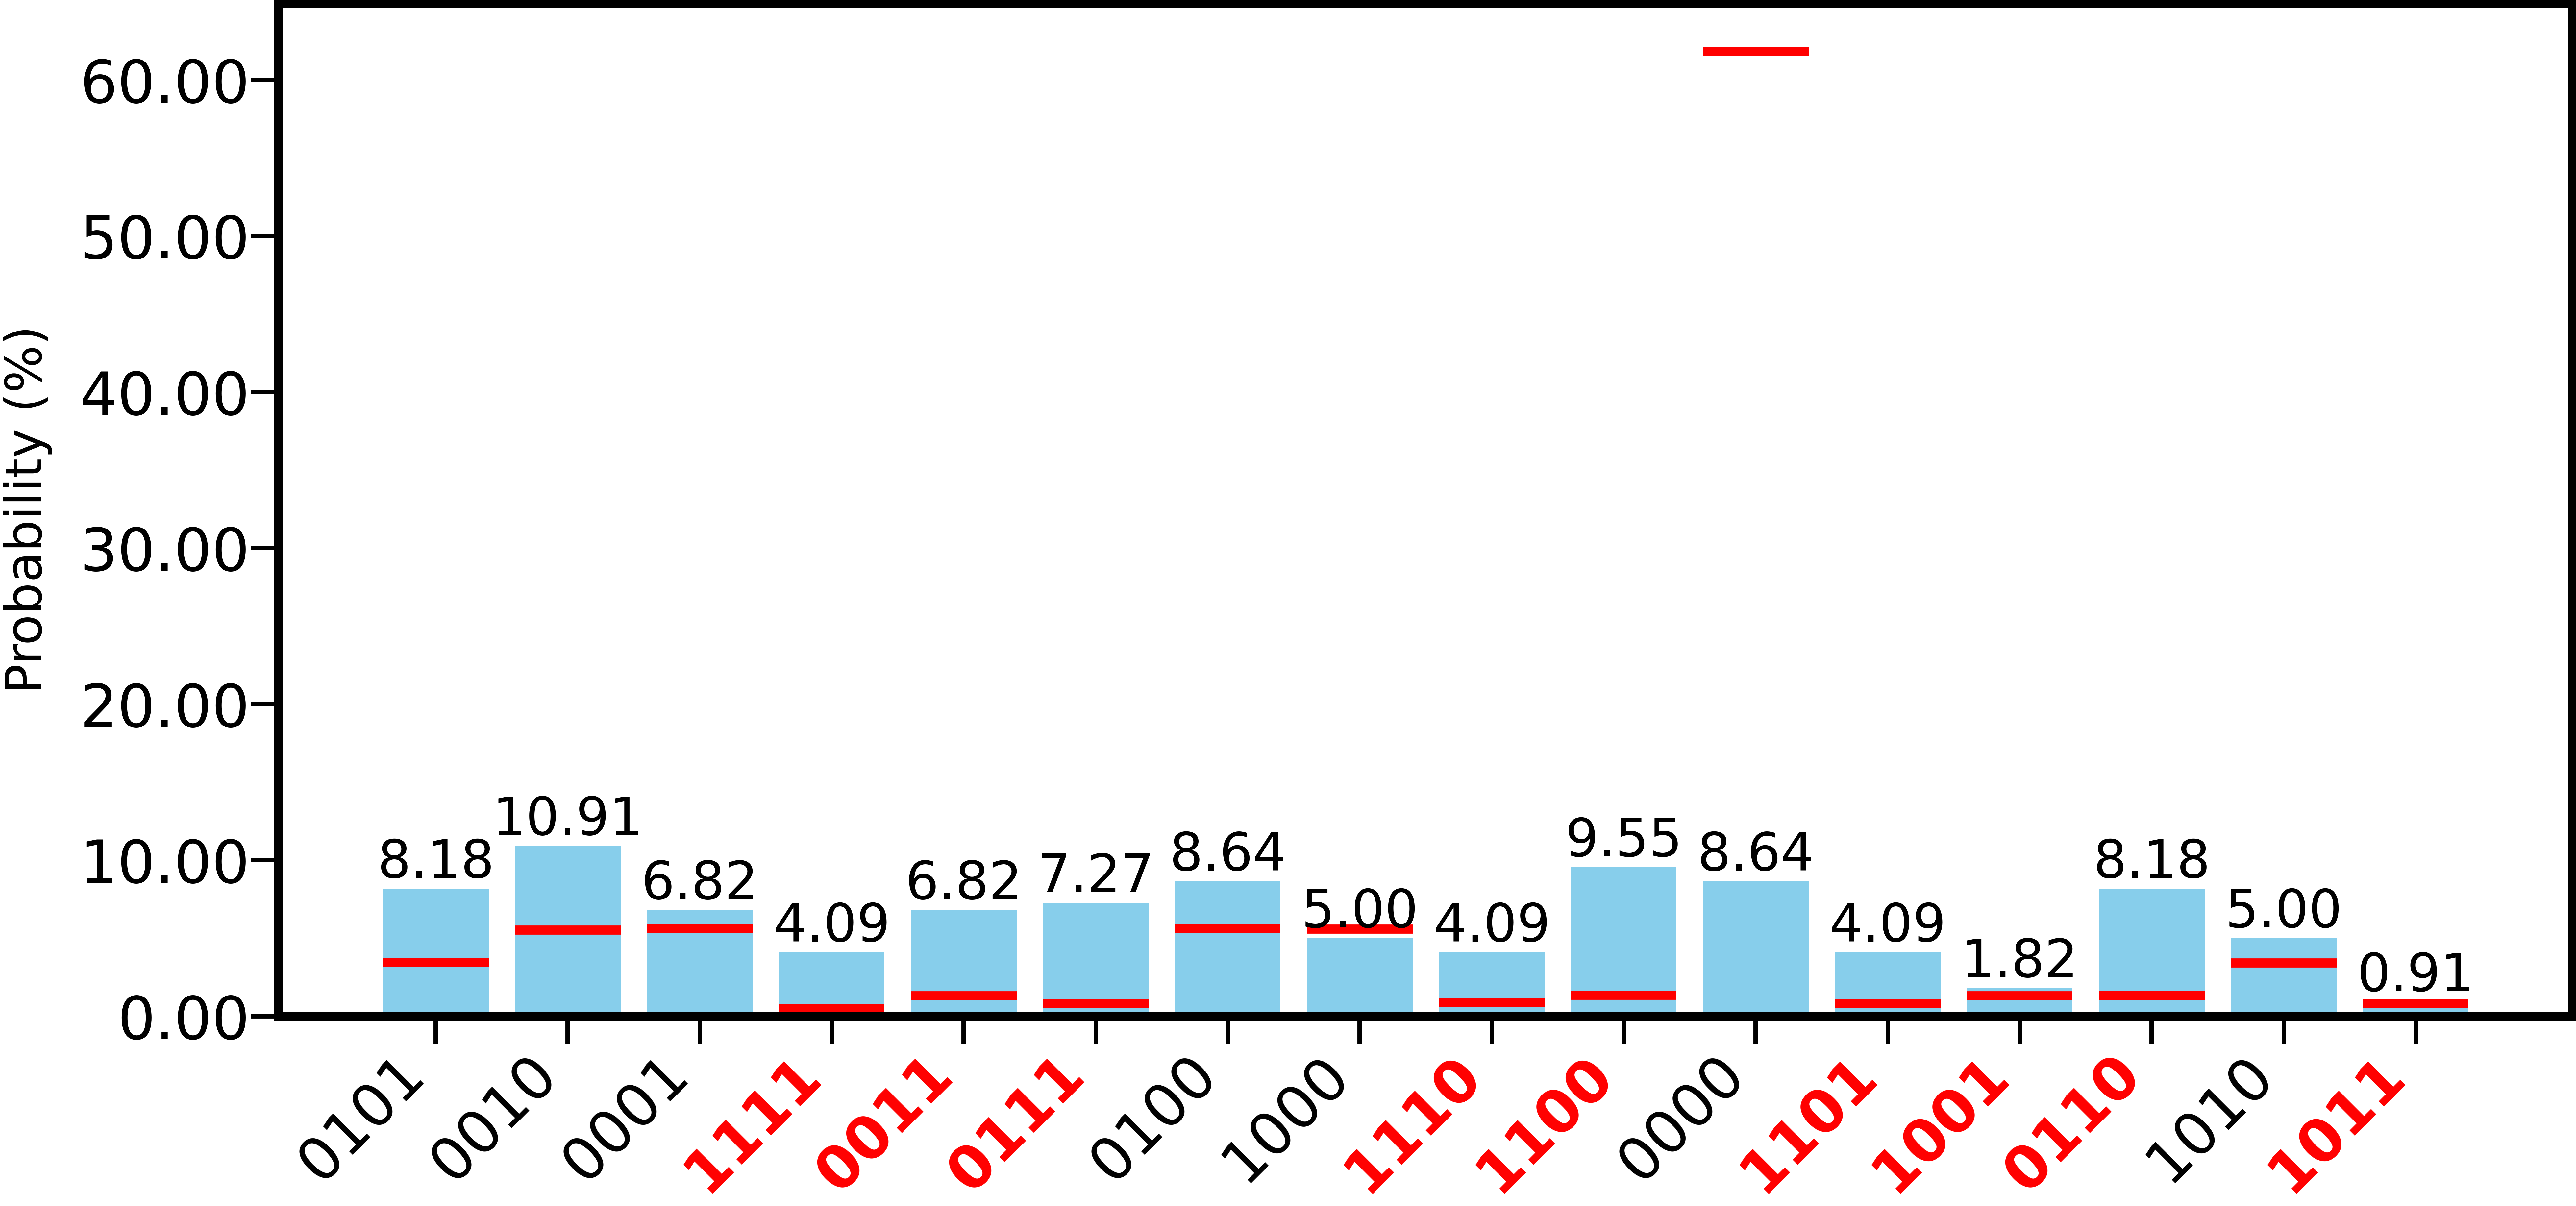

In [26]:
total_count3 = sum(counts3.values())
total_simu_counts3 = sum(simu_counts3.values())

probabilities = {state: count / total_count3 for state, count in counts3.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts3 for state, count in simu_counts3.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(90, 40))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
              f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=115)

highlight_states = {'1001', '0011', '1011', '1111', '1101', '1100', '0110', '1110', '0111'}  
tick_labels = plt.gca().get_xticklabels()  
tick_labels_text = plt.gca().get_xticklabels() 
for label, state in zip(tick_labels_text, states):  
    if state in highlight_states:
        label.set_color('red')  
        label.set_fontweight('bold') 

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0025
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=20)

def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=130)
plt.tick_params(axis='y', labelsize=130)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=110, labelpad=60)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(20)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(20)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(20)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(20)
ax.tick_params(axis='x', length=60, width=10, direction='out')
ax.tick_params(axis='y', length=60, width=10, direction='out')

plt.show()